In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
torch.__version__

'2.1.0'

In [1]:
from model_structures.model_uncondition import DiT_Uncondition_models
from diffusion import create_diffusion

model = DiT_Uncondition_models["DiT_Uncondition-B/4"](
        input_size=32
    )
diffusion = create_diffusion(str(1000))

In [ ]:
list(range(10, 0))

: 

In [3]:
end_step = 5
list(range(end_step, 10))[::-1]

[9, 8, 7, 6, 5]

/home/AD/xiw136/anaconda3/envs/DiT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('../datasets/gan_data')
dataset

Dataset ImageFolder
    Number of datapoints: 60000
    Root location: ../datasets/gan_data

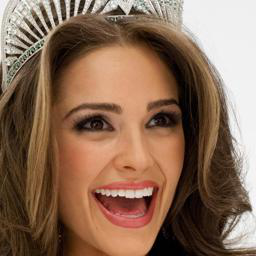

In [12]:
dataset[30000][0]

In [19]:
output1[-1].shape

torch.Size([10, 512, 2, 2])

In [1]:
import numpy as np 
import imageio
a = np.random.random((256,256,3))
imageio.imwrite('../results/test.tiff', a)

In [20]:
(img<0).sum()

238

/tmp/ipykernel_586831/4008874479.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('../results/test_tiff/baseline-celebahq256-000-DiT_Uncondition-B-4-00180000/0000015.tiff')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


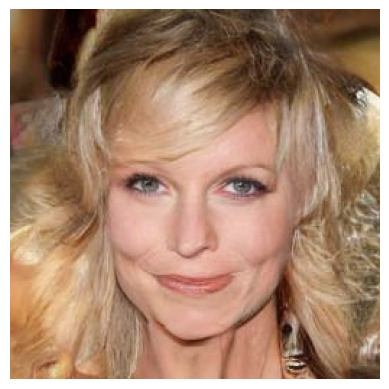

(256, 256, 3)

In [17]:
import imageio
import matplotlib.pyplot as plt

# 读取图像
img = imageio.imread('../results/test_tiff/baseline-celebahq256-000-DiT_Uncondition-B-4-00180000/0000015.tiff')
#img = imageio.imread('../results/perceptual_end_to_end-celebahq256-007-DiT_Uncondition-B-4/fid_samples/00000000/0000000.png')

# 显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()
img.shape

In [8]:
import torch
import torch.nn as nn
from model_structures.conditional_resnet import ConditionResNet
net = ConditionResNet()
x = torch.rand((10, 4, 32, 32))
t = torch.ones((10))
output = net(x, t)

tensor([5.4030e-01, 7.3176e-01, 8.4601e-01, 9.1240e-01, 9.5042e-01, 9.7201e-01,
        9.8423e-01, 9.9112e-01, 9.9500e-01, 9.9719e-01, 9.9842e-01, 9.9911e-01,
        9.9950e-01, 9.9972e-01, 9.9984e-01, 9.9991e-01, 9.9995e-01, 9.9997e-01,
        9.9998e-01, 9.9999e-01, 9.9999e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 8.4147e-01, 6.8156e-01, 5.3317e-01, 4.0931e-01,
        3.1098e-01, 2.3492e-01, 1.7689e-01, 1.3296e-01, 9.9833e-02, 7.4919e-02,
        5.6204e-02, 4.2157e-02, 3.1618e-02, 2.3712e-02, 1.7782e-02, 1.3335e-02,
        9.9998e-03, 7.4989e-03, 5.6234e-03, 4.2170e-03, 3.1623e-03, 2.3714e-03,
        1.7783e-03, 1.3335e-03, 1.0000e-03, 7.4989e-04, 5.6234e-04, 4.2170e-04,
        3.1623e-04, 2.3714e-04, 1.7783e-04, 1.3335e-04])
tensor([-1.2361e-01,  8.6625e-02,  5.0604e-02, -3.8535e-02,  1.2183e-01,
         3.2275e-03, -1.0736e-01, -3.1445e-01, -2.0244e-01,  8.5131e-0

In [4]:
output

tensor([[ 0.1250, -0.0322],
        [ 0.1207, -0.0484],
        [ 0.1014, -0.0390],
        [ 0.1019, -0.0257],
        [ 0.1406, -0.0139],
        [ 0.1144, -0.0285],
        [ 0.1042, -0.0131],
        [ 0.1379, -0.0195],
        [ 0.1155, -0.0405],
        [ 0.1227, -0.0211]], grad_fn=<AddmmBackward0>)

In [29]:
import torch
import torch.nn as nn
from model_structures.resnet import ResNet,extract_resnet_perceptual_outputs_v1,perceptual_loss_func
class SmallMLP(nn.Module):
    def __init__(self):
        super(SmallMLP, self).__init__()
        
        # 定义MLP的结构
        self.layers = nn.Sequential(
            nn.Linear(2048, 1),  # 第一层，将2048维度减少到1024维度
        )
        
    def forward(self, x):
        return self.layers(x)
    

def requires_grad(model, flag=True):
    """
    Set requires_grad flag for all parameters in a model.
    """
    for p in model.parameters():
        p.requires_grad = flag
mlp = SmallMLP()
requires_grad(mlp, False)

net = ResNet()
x1 = torch.rand((10, 4, 32, 32))
label = torch.rand((10, 1))
output = extract_resnet_perceptual_outputs_v1(net, x1)[-1]

output = mlp(output.flatten(start_dim=1))
loss_func = nn.MSELoss()
loss = loss_func(label, output)
loss.backward()
net.resnet.conv1.weight.grad

tensor([[[[ 0.0504, -0.9333,  1.6170],
          [-0.7399,  0.4631, -0.4713],
          [ 0.2960,  0.9112, -0.3409]],

         [[-0.4876,  0.0598, -0.3480],
          [-0.1134, -0.1783, -0.3767],
          [-0.6591,  0.5593,  1.6506]],

         [[-1.0198,  0.6616,  0.5727],
          [ 1.4633, -0.4668, -1.3136],
          [-0.1854,  0.4739, -0.7715]],

         [[ 0.0182,  0.1970,  1.8792],
          [ 0.6071,  1.4552,  0.9557],
          [ 0.1469, -0.0166,  0.1209]]],


        [[[ 0.3822,  0.6556,  0.8537],
          [ 0.6682,  0.5090,  0.6793],
          [ 0.7775, -0.8715, -0.2264]],

         [[ 0.4728, -0.7568,  1.5128],
          [-0.2991,  0.2532, -0.3489],
          [ 0.0751, -1.5088, -0.7012]],

         [[-0.1579,  1.5727,  0.3669],
          [ 1.3960,  0.3813,  1.3082],
          [ 0.3051,  0.3451, -0.0521]],

         [[ 1.1061,  0.4520,  1.0856],
          [ 0.9537,  0.0247, -0.7539],
          [ 0.8855,  1.1548,  0.2197]]],


        [[[ 0.0000,  0.0000,  0.0000],
     

In [17]:
import torch
import torch.nn as nn
from model_structures.resnet import ResNet,extract_resnet_perceptual_outputs_v1,perceptual_loss_func


net = ResNet()
def requires_grad(model, flag=True):
    """
    Set requires_grad flag for all parameters in a model.
    """
    for p in model.parameters():
        p.requires_grad = flag
requires_grad(net.resnet.layer1, False)

x1 = torch.rand((10, 4, 32, 32))
output1 =  extract_resnet_perceptual_outputs_v1(net, x1)
x2 = torch.rand((10, 4, 32, 32))
output2 =  extract_resnet_perceptual_outputs_v1(net, x2)

loss_func = nn.MSELoss()
loss = perceptual_loss_func(loss_func, output1, output2)
print(loss)
loss.backward()
net.resnet.conv1.weight.grad

tensor(3.7801)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [4]:
loss

tensor(0., grad_fn=<AddBackward0>)

In [2]:
net

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [3]:
for x in output:
    print(x.shape)

torch.Size([10, 64, 16, 16])
torch.Size([10, 64, 16, 16])
torch.Size([10, 128, 8, 8])
torch.Size([10, 256, 4, 4])
torch.Size([10, 512, 2, 2])


In [8]:
x.mean(axis=0).shape

torch.Size([512, 2, 2])

In [1]:
import torch
import torch.nn as nn
from model_structures import resnet, discriminator
net = resnet.ResNet()
net = discriminator.Pretrained_ResNet_Discriminator(net)
x1 = torch.rand((10, 4, 32, 32))
y1 = net(x1)
y1.shape

AttributeError: 'ResNet' object has no attribute 'fc'

In [12]:
y1

tensor([[1.6720, 1.3306, 0.9475,  ..., 0.0000, 0.7648, 1.0346],
        [0.8868, 0.0000, 1.3646,  ..., 0.0000, 0.0000, 0.0000],
        [3.6659, 3.7026, 2.7838,  ..., 0.5543, 1.5178, 1.3130],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0263, 0.0499, 0.0790],
        [0.7808, 0.2304, 0.8533,  ..., 3.9753, 3.9743, 4.2762],
        [1.5862, 1.9369, 0.2653,  ..., 0.8254, 3.2477, 1.6207]],
       grad_fn=<ReshapeAliasBackward0>)

In [19]:
output = ((y1-y2)**2)

In [20]:
output.mean(dim=list(range(1, len(output.shape)))).shape

torch.Size([10])

In [21]:
a = torch.rand((10, 2048))
d = torch.rand(10)
d.mean(), a.mean()

(tensor(0.5659), tensor(0.5029))

In [22]:
d.mean() + 0.2*a.mean()

tensor(0.6664)

In [24]:
(d+0.2*a.mean(dim=-1)).mean()

tensor(0.6664)

In [1]:
import torch.nn as nn
import torchvision.models as models

class ResNet(nn.Module):
    def __init__(self, resolution=32,  num_classes=1000):
        super(ResNet, self).__init__()
        self.resolution = resolution
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.resnet.conv1 = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        if num_classes != 1000:
            self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
    
    def forward(self, x):
        return self.resnet(x)
    
net = ResNet(num_classes=2)

In [2]:
net

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [5]:
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding
import torch 
import torch.nn as nn
class ResNetDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3)
        temb_channels = 256
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        self.block1 = ResnetBlock2D(in_channels=64, out_channels=128, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block2 = ResnetBlock2D(in_channels=128, out_channels=256, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block3 = ResnetBlock2D(in_channels=256, out_channels=512, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 1)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        x = self.conv1(x)
        
        x = self.block1(x, t)
        x = self.block2(x, t)
        x = self.block3(x, t)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        x = self.sigmoid(x)
        
        return x

discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(16)

output = discriminator(x, t)
print(output)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x16 and 128x256)

In [7]:

import torch 
import torch.nn as nn
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding, Timesteps

class ResNetDiscriminator(nn.Module):
    def __init__(
        self,
        input_size = 32,
        in_channels = 4,
        block_output_channels = (64, 128, 256, 512),
        class_num = 1,
        ):
        super().__init__()
        self.input_size = input_size
        self.class_num = class_num
        
        time_embed_dim = block_output_channels[0] * 4
        timestep_input_dim = block_output_channels[0]
        
        self.time_proj = Timesteps(block_output_channels[0], flip_sin_to_cos=True, downscale_freq_shift=0)
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        
        self.conv1 = nn.Conv2d(in_channels, block_output_channels[0], kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        
        self.layer1 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[0], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer2 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[1], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer3 = ResnetBlock2D(in_channels=block_output_channels[1], 
                                    out_channels=block_output_channels[2], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer4 = ResnetBlock2D(in_channels=block_output_channels[2], 
                                    out_channels=block_output_channels[3], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc = nn.Linear(block_output_channels[3], class_num)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        t = t * torch.ones(x.shape[0], dtype=t.dtype, device=t.device)
        t_emb = self.time_proj(t)
        emb = self.time_embedding(t_emb)
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.maxpool(x)
        
        x = self.layer1(x, emb)
        x = self.layer2(x, emb)
        x = self.layer3(x, emb)
        x = self.layer4(x, emb)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        if self.class_num == 1:
            x = self.sigmoid(x)
        return x

# Initialize the discriminator
discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(64)

# Forward Pass
output = discriminator(x, t)
print(output.shape)

torch.Size([64, 1])
